<a href="https://colab.research.google.com/github/packetech/Visualization/blob/main/MappingMuseums_Ver1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MAPPING MUSEUM CLASSWORK**

In [96]:
# Load libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# display all columns
pd.set_option('display.max_columns', None)

### **BASIC EDA (Exploratory Data Analysis)**

In [4]:
Map = pd.read_csv('/content/sample_data/MappingMuseumsData2021_09_30_processed_v2.csv')

In [5]:
Map.dtypes

museum_id                             object
museum_name                           object
address_line_1                        object
address_line_2                        object
city                                  object
postcode                              object
latitude                             float64
longitude                            float64
admin_area_full                       object
admin_area_1                          object
admin_area_2                          object
admin_area_2_type                     object
admin_area_3                          object
admin_area_3_type                     object
admin_area_4                          object
admin_area_4_type                     object
accreditation                         object
governance_type                       object
governance_subtype                    object
size                                  object
size_provenance                       object
subject_matter_full                   object
subject_ma

In [6]:
Map.shape

(4141, 41)

In [7]:
Map.head()

,museum_id,museum_name,address_line_1,address_line_2,city,postcode,latitude,longitude,admin_area_full,admin_area_1,admin_area_2,admin_area_2_type,admin_area_3,admin_area_3_type,admin_area_4,admin_area_4_type,accreditation,governance_type,governance_subtype,size,size_provenance,subject_matter_full,subject_matter,subject_matter_subtype_1,subject_matter_subtype_2,year_opened_low,year_opened_high,year_closed_low,year_closed_high,data_primary_provenance,area_deprivation_index,area_deprivation_index_crime,area_deprivation_index_education,area_deprivation_index_employment,area_deprivation_index_health,area_deprivation_index_housing,area_deprivation_index_income,area_deprivation_index_services,area_geodemographic_supergroup,area_geodemographic_group,area_geodemographic_subgroup
0,mm.New.1,Titanic Belfast,1 Olympic Way,NaN,Belfast,BT3 9EP,54.608080,-5.909915,Northern Ireland/Belfast (NI Loc Gov District),Northern Ireland,Belfast,NI Loc Gov District,NaN,NaN,NaN,NaN,Unaccredited,Independent,Not for profit,large,NaN,Sea and seafaring/Boats and ships,Sea and seafaring,Boats and ships,NaN,2012,2012,na,na,new,2,3,1,2,1,4,5,5,Business Education and Heritage Centres,Larger Towns and Cities,Larger Towns and Cities
1,mm.aim.1230,The Woodland Heritage Museum,NaN,Brokerswood,nr Westbury,BA13 4EH,51.270903,-2.231863,England/South West (English Region)/Wiltshire ...,England,South West,English Region,Wiltshire,English UA,NaN,NaN,Unaccredited,Independent,Unknown,small,aim_size_designation,Natural world/Other,Natural world,Other,NaN,1971,1971,2007,2017,aim,9,8,9,8,8,6,8,4,Town and Country Living,Country Living,Country Living
2,mm.domus.WM019,Warwickshire Museum Of Rural Life,Warwick College of Agriculture,Horticulture & Equine Studies,Moreton Morrell,CV35 9BL,52.197146,-1.555528,England/West Midlands (English Region)/Warwick...,England,West Midlands,English Region,Warwickshire,English County,Stratford-on-Avon,English District or Borough,Unaccredited,Government,Local Authority,medium,mm_prediction_random_forest,Rural Industry/Farming,Rural Industry,Farming,NaN,1984,1984,na,na,domus,8,9,8,10,8,5,8,1,Countryside Living,English and Welsh Countryside,Older Farming Communities
3,mm.aim.0485,Jet Age Museum,57 Crown Drive,Bishops Cleeve,Cheltenham,GL52 8TA,51.940092,-2.060766,England/South West (English Region)/Gloucester...,England,South West,English Region,Gloucestershire,English County,Tewkesbury,English District or Borough,Accredited,Independent,Not for profit,medium,aim_size_designation,War and conflict/Airforce,War and conflict,Airforce,NaN,2013,2013,na,na,aim,8,10,7,7,8,7,8,4,Town and Country Living,Country Living,Country Living
4,mm.aim.0486,Jewish Military Museum,c/o Jewish Museum,Raymond Burton House,London,NW1 7NB,51.537163,-0.144517,England/London (English Region)/Camden (London...,England,London,English Region,Camden,London Borough,NaN,NaN,Unaccredited,Independent,Not for profit,small,aim_size_designation,War and conflict/Military,War and conflict,Military,NaN,1996,1996,2015,2015,aim,2,1,6,3,2,1,3,4,London Cosmopolitan,London Cosmopolitan,London Cosmopolitan


In [8]:
Map.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,4141.0,52.940834,1.947061,49.914625,51.484802,52.475988,53.958016,60.790187
longitude,4141.0,-1.941854,1.840939,-8.091797,-3.087918,-1.844739,-0.463295,1.757594
year_opened_low,4141.0,1968.629075,39.260207,1621.000000,1959.000000,1978.000000,1993.000000,2021.000000
year_opened_high,4141.0,1973.044192,40.254915,1621.000000,1961.000000,1982.000000,1998.000000,2021.000000
area_deprivation_index,4141.0,5.440473,2.475902,1.000000,4.000000,5.000000,7.000000,10.000000
area_deprivation_index_crime,4141.0,5.430814,3.071744,1.000000,3.000000,6.000000,8.000000,10.000000
area_deprivation_index_education,4141.0,6.044675,2.607159,1.000000,4.000000,6.000000,8.000000,10.000000
area_deprivation_index_employment,4141.0,6.076310,2.761620,1.000000,4.000000,6.000000,8.000000,10.000000
area_deprivation_index_health,4141.0,6.017387,2.818964,1.000000,4.000000,6.000000,8.000000,10.000000
area_deprivation_index_housing,4141.0,3.966916,2.750954,1.000000,1.000000,3.000000,6.000000,10.000000


In [9]:
Map.drop(['museum_id','admin_area_1','admin_area_2','admin_area_2_type','admin_area_3','admin_area_3_type','admin_area_4','admin_area_4_type','subject_matter','subject_matter_subtype_1','subject_matter_subtype_2','size_provenance','data_primary_provenance'], axis=1, inplace=True)

In [10]:
Map.shape

(4141, 28)

In [11]:
Map.head()

,museum_name,address_line_1,address_line_2,city,postcode,latitude,longitude,admin_area_full,accreditation,governance_type,governance_subtype,size,subject_matter_full,year_opened_low,year_opened_high,year_closed_low,year_closed_high,area_deprivation_index,area_deprivation_index_crime,area_deprivation_index_education,area_deprivation_index_employment,area_deprivation_index_health,area_deprivation_index_housing,area_deprivation_index_income,area_deprivation_index_services,area_geodemographic_supergroup,area_geodemographic_group,area_geodemographic_subgroup
0,Titanic Belfast,1 Olympic Way,NaN,Belfast,BT3 9EP,54.608080,-5.909915,Northern Ireland/Belfast (NI Loc Gov District),Unaccredited,Independent,Not for profit,large,Sea and seafaring/Boats and ships,2012,2012,na,na,2,3,1,2,1,4,5,5,Business Education and Heritage Centres,Larger Towns and Cities,Larger Towns and Cities
1,The Woodland Heritage Museum,NaN,Brokerswood,nr Westbury,BA13 4EH,51.270903,-2.231863,England/South West (English Region)/Wiltshire ...,Unaccredited,Independent,Unknown,small,Natural world/Other,1971,1971,2007,2017,9,8,9,8,8,6,8,4,Town and Country Living,Country Living,Country Living
2,Warwickshire Museum Of Rural Life,Warwick College of Agriculture,Horticulture & Equine Studies,Moreton Morrell,CV35 9BL,52.197146,-1.555528,England/West Midlands (English Region)/Warwick...,Unaccredited,Government,Local Authority,medium,Rural Industry/Farming,1984,1984,na,na,8,9,8,10,8,5,8,1,Countryside Living,English and Welsh Countryside,Older Farming Communities
3,Jet Age Museum,57 Crown Drive,Bishops Cleeve,Cheltenham,GL52 8TA,51.940092,-2.060766,England/South West (English Region)/Gloucester...,Accredited,Independent,Not for profit,medium,War and conflict/Airforce,2013,2013,na,na,8,10,7,7,8,7,8,4,Town and Country Living,Country Living,Country Living
4,Jewish Military Museum,c/o Jewish Museum,Raymond Burton House,London,NW1 7NB,51.537163,-0.144517,England/London (English Region)/Camden (London...,Unaccredited,Independent,Not for profit,small,War and conflict/Military,1996,1996,2015,2015,2,1,6,3,2,1,3,4,London Cosmopolitan,London Cosmopolitan,London Cosmopolitan


In [12]:
# using lambda function to eliminate the null values and add both addresses

Map['address_line_full'] = Map.apply(lambda x: '' if pd.isnull(x['address_line_1']) else x['address_line_1'], axis=1) +' '+ Map.apply(lambda x: '' if pd.isnull(x['address_line_2']) else x['address_line_2'], axis=1)


# drop both addresses
Map.drop(['address_line_1','address_line_2'], axis=1, inplace=True)


# moving the combined address from the end of the features to the positions of the dropped address
# insert column with insert(location, column_name, column_value)

column_to_move = Map.pop("address_line_full") # copies the values of the column
Map.insert(1, "address_line_full", column_to_move)




In [13]:
Map.head()

,museum_name,address_line_full,city,postcode,latitude,longitude,admin_area_full,accreditation,governance_type,governance_subtype,size,subject_matter_full,year_opened_low,year_opened_high,year_closed_low,year_closed_high,area_deprivation_index,area_deprivation_index_crime,area_deprivation_index_education,area_deprivation_index_employment,area_deprivation_index_health,area_deprivation_index_housing,area_deprivation_index_income,area_deprivation_index_services,area_geodemographic_supergroup,area_geodemographic_group,area_geodemographic_subgroup
0,Titanic Belfast,1 Olympic Way,Belfast,BT3 9EP,54.608080,-5.909915,Northern Ireland/Belfast (NI Loc Gov District),Unaccredited,Independent,Not for profit,large,Sea and seafaring/Boats and ships,2012,2012,na,na,2,3,1,2,1,4,5,5,Business Education and Heritage Centres,Larger Towns and Cities,Larger Towns and Cities
1,The Woodland Heritage Museum,Brokerswood,nr Westbury,BA13 4EH,51.270903,-2.231863,England/South West (English Region)/Wiltshire ...,Unaccredited,Independent,Unknown,small,Natural world/Other,1971,1971,2007,2017,9,8,9,8,8,6,8,4,Town and Country Living,Country Living,Country Living
2,Warwickshire Museum Of Rural Life,Warwick College of Agriculture Horticulture & ...,Moreton Morrell,CV35 9BL,52.197146,-1.555528,England/West Midlands (English Region)/Warwick...,Unaccredited,Government,Local Authority,medium,Rural Industry/Farming,1984,1984,na,na,8,9,8,10,8,5,8,1,Countryside Living,English and Welsh Countryside,Older Farming Communities
3,Jet Age Museum,57 Crown Drive Bishops Cleeve,Cheltenham,GL52 8TA,51.940092,-2.060766,England/South West (English Region)/Gloucester...,Accredited,Independent,Not for profit,medium,War and conflict/Airforce,2013,2013,na,na,8,10,7,7,8,7,8,4,Town and Country Living,Country Living,Country Living
4,Jewish Military Museum,c/o Jewish Museum Raymond Burton House,London,NW1 7NB,51.537163,-0.144517,England/London (English Region)/Camden (London...,Unaccredited,Independent,Not for profit,small,War and conflict/Military,1996,1996,2015,2015,2,1,6,3,2,1,3,4,London Cosmopolitan,London Cosmopolitan,London Cosmopolitan


In [14]:
# Columns with null values
Map.columns[Map.isnull().any()]

Index(['city', 'governance_subtype'], dtype='object')

In [15]:
# Total number of null values in dataset
Map.isnull().sum().sum()

223

In [16]:
# Null values in this column
Map['city'].isnull().sum().sum()

4

In [17]:
# Null values in this column
Map['governance_subtype'].isnull().sum().sum()

219

In [18]:
# see sample null values of the column 'city'
Map[Map['city'].apply(lambda x: pd.isnull(x))]

,museum_name,address_line_full,city,postcode,latitude,longitude,admin_area_full,accreditation,governance_type,governance_subtype,size,subject_matter_full,year_opened_low,year_opened_high,year_closed_low,year_closed_high,area_deprivation_index,area_deprivation_index_crime,area_deprivation_index_education,area_deprivation_index_employment,area_deprivation_index_health,area_deprivation_index_housing,area_deprivation_index_income,area_deprivation_index_services,area_geodemographic_supergroup,area_geodemographic_group,area_geodemographic_subgroup
525,Aycliffe And District Bus Preservation Society,,NaN,DL5 4UL,54.630414,-1.565384,England/North East (English Region)/North East...,Accredited,Independent,Not for profit,small,Transport/Buses and trams,1980,1980,na,na,5,7,5,4,2,10,4,6,Services and Industrial Legacy,Services Manufacturing and Mining Legacy,Mining Legacy
963,Bluebell Railway Museum,Sheffield Park Station,NaN,TN22 3QL,50.995697,-0.001111,England/South East (English Region)/East Susse...,Accredited,Independent,Not for profit,medium,Transport/Trains and railways,2011,2011,na,na,7,7,8,9,10,3,9,1,Countryside Living,Remoter Coastal Living,Ageing Coastal Living
1233,Body Worlds,London Pavilion 1 Piccadilly Circus,NaN,W1J 0DA,51.510397,-0.134592,England/London (English Region)/Westminster (L...,Unaccredited,Independent,Private,unknown,Medicine and health/Other,2018,2018,na,na,4,3,5,7,8,1,7,2,London Cosmopolitan,London Cosmopolitan,London Cosmopolitan
3694,Northern Irelands Secret Bunker - Cold War Museum,,NaN,BT62 1QU,54.450961,-6.512593,Northern Ireland/Armagh City (NI Loc Gov Distr...,Unaccredited,Independent,Private,small,War and conflict/Bunker,2010,2010,na,na,6,9,7,8,9,10,4,2,Town and Country Living,Northern Ireland Countryside,Northern Ireland Countryside


In [19]:
# since the total number of null is not much lets drop the rows with them using:
# df.dropna(subset=['column_name'], inplace=True)

Map.dropna(subset=['city','governance_subtype'], inplace=True)

In [23]:
# Checking again for Columns with null values (we do not have any more null values)
Map.columns[Map.isnull().any()]

Index([], dtype='object')

In [24]:
# check shape

Map.shape

(3918, 27)

In [25]:
Map.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3918 entries, 0 to 4140
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   museum_name                        3918 non-null   object 
 1   address_line_full                  3918 non-null   object 
 2   city                               3918 non-null   object 
 3   postcode                           3918 non-null   object 
 4   latitude                           3918 non-null   float64
 5   longitude                          3918 non-null   float64
 6   admin_area_full                    3918 non-null   object 
 7   accreditation                      3918 non-null   object 
 8   governance_type                    3918 non-null   object 
 9   governance_subtype                 3918 non-null   object 
 10  size                               3918 non-null   object 
 11  subject_matter_full                3918 non-null   objec

In [98]:
# group the museums to gain more insights

Map.groupby('size').size().sort_values(ascending=False)


size
small      2261
medium      963
large       523
unknown     159
huge         12
dtype: int64

In [99]:
Map.groupby('city').size().sort_values(ascending=False)#[:60]


city
London              238
York                 37
Edinburgh            32
Glasgow              30
Bristol              27
                   ... 
Milford Haven         1
Millford village      1
Chobham               1
Chirk                 1
nr. Yeovil            1
Length: 1628, dtype: int64

In [100]:
Map.groupby('subject_matter_full').size().sort_values(ascending=False)#[:60]



subject_matter_full
Local Histories                  857
Buildings/Houses/Large houses    409
Arts/Fine and decorative arts    161
Transport/Trains and railways    133
War and conflict/Regiment        129
                                ... 
Arts/Literature                    4
Natural world/Fossils              4
Belief and identity                1
Communications                     1
Archaeology                        1
Length: 111, dtype: int64

In [101]:
Map.groupby('museum_name').size().sort_values(ascending=False)#[:60]


museum_name
Public Library & Museum (Camborne)          2
100th Bomb Group Memorial Museum            1
Portland Castle                             1
Pontefract Museum                           1
Pontypool Museum                            1
                                           ..
Gods House Tower - Museum Of Archaeology    1
Gold Hill Museum And Gardens                1
Golden Hinde Ii                             1
Golden Hinde Museum Ship                    1
y Gaer                                      1
Length: 3917, dtype: int64

#### **OBSERVATION**:

Based on the last cell; grouping and counting frequency of accurence of  museum name, it was found that only one name had two rows in the dataset (that it was repeated). That means the total sample in the dataset 4141 does not currespond to the total museum captured in the dataset; but the total captured is 4140

### **DASHBOARDING AND FINAL OBSERVATIONS**

In [ ]:
# Let's see how the outliers look like

<Axes: ylabel='latitude'>

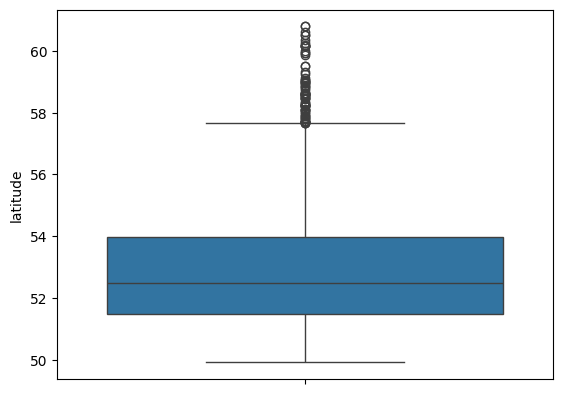

In [26]:
sns.boxplot(Map.latitude)


<Axes: ylabel='longitude'>

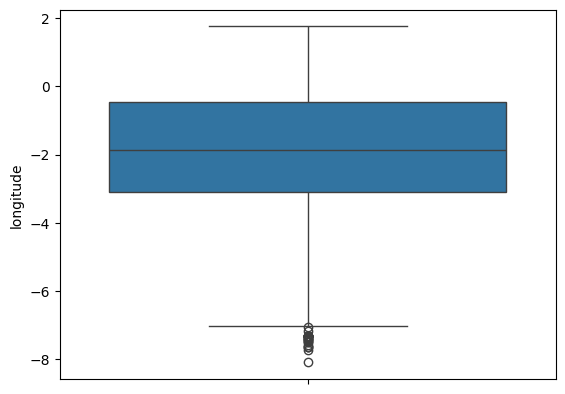

In [27]:

sns.boxplot(Map.longitude)

<Axes: ylabel='year_opened_low'>

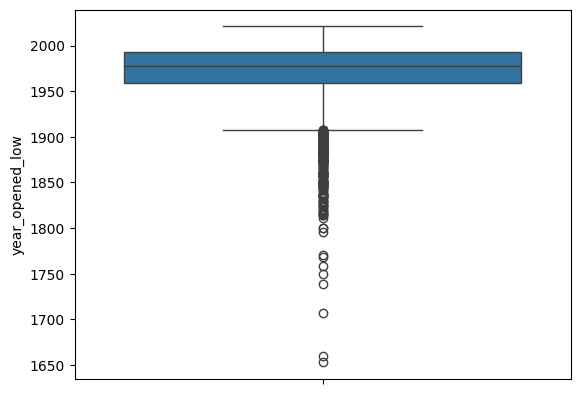

In [28]:

sns.boxplot(Map.year_opened_low)

<Axes: ylabel='year_opened_high'>

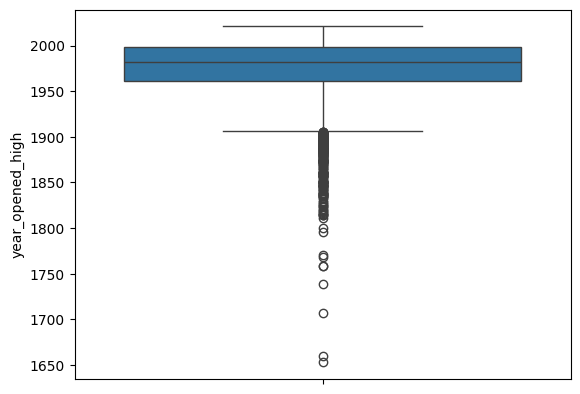

In [29]:

sns.boxplot(Map.year_opened_high)

<Axes: >

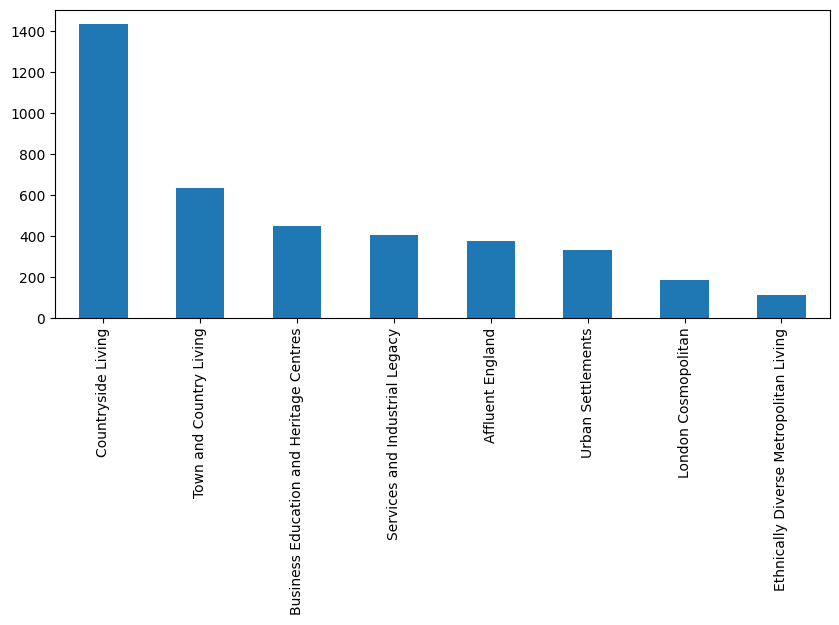

In [35]:
# see how 'area_geodemographic_supergroup' plot looks like in terms of count and their names and how many they are
import matplotlib.pyplot as plt
plt.figure(figsize=[10,4])
Map['area_geodemographic_supergroup'].value_counts().plot(kind='bar')

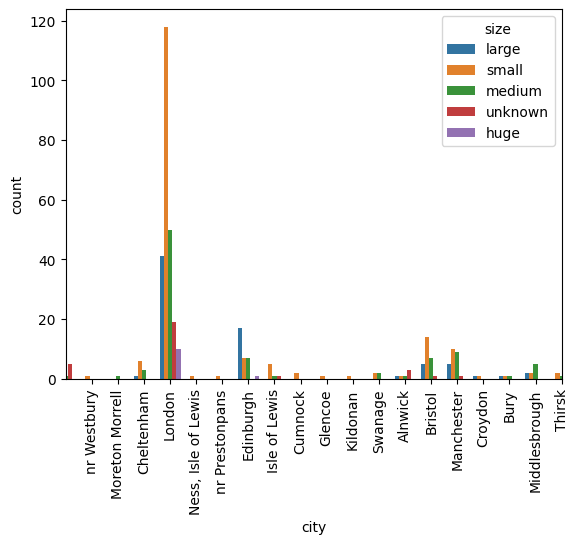

In [36]:
#sns.countplot(Map, x="city", hue="size")

# see an approximate count of museum size the city feature


fig, ax = plt.subplots()
sns.countplot(Map, x="city", hue="size")
#sns.histplot(Map, ax=ax)  # distplot is deprecate and replaced by histplot
ax.set_xlim(0,15)
ax.set_xticks(range(1,20))
ax.tick_params(axis='x', rotation=90)
plt.show()

In [ ]:
Map.drop(['area_deprivation_index',], axis=1, inplace=True)

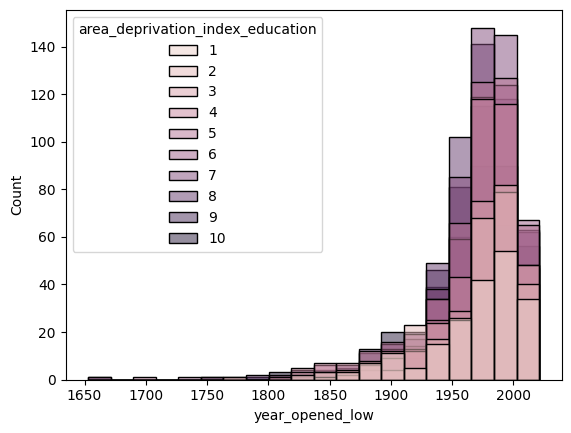

In [49]:
#See numberical data count

# see an approximate count of each feature

import matplotlib.pyplot as plt
import seaborn as sns

#fig, ax = plt.subplots()

sns.histplot(data=Map, x="year_opened_low", hue="area_deprivation_index_education",bins=20)
#sns.histplot(Map, ax=ax)  # distplot is deprecate and replaced by histplot
#ax.set_xlim(0,15)
#ax.set_xticks(range(1,30))
plt.show()

In [50]:
Map[['year_opened_low','year_opened_high','year_closed_low','year_closed_high']].head()

,year_opened_low,year_opened_high,year_closed_low,year_closed_high
0,2012,2012,na,na
1,1971,1971,2007,2017
2,1984,1984,na,na
3,2013,2013,na,na
4,1996,1996,2015,2015


In [51]:

# Map[(Map["year_opened_low"] != Map["year_opened_high"])]


In [52]:
# Map[(Map["year_closed_low"] != Map["year_closed_high"])]

In [73]:
YearOpenClose_df = Map[['size','year_opened_low','year_opened_high','year_closed_low','year_closed_high']]

In [74]:
YearOpenClose_df.head()

,size,year_opened_low,year_opened_high,year_closed_low,year_closed_high
0,large,2012,2012,na,na
1,small,1971,1971,2007,2017
2,medium,1984,1984,na,na
3,medium,2013,2013,na,na
4,small,1996,1996,2015,2015


In [75]:
YearOpenClose_df.shape

(3918, 5)

In [76]:
YearOpenClose_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3918 entries, 0 to 4140
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   size              3918 non-null   object
 1   year_opened_low   3918 non-null   int64 
 2   year_opened_high  3918 non-null   int64 
 3   year_closed_low   3918 non-null   object
 4   year_closed_high  3918 non-null   object
dtypes: int64(2), object(3)
memory usage: 183.7+ KB


In [77]:
print(YearOpenClose_df['year_closed_low'].value_counts()['na']) ; print(YearOpenClose_df['year_closed_high'].value_counts()['na'])

3155
3155


In [78]:
# df['ifor'] = df.apply(lambda row: x if something else y, axis=1)

YearOpenClose_df['year_closed_low'] = YearOpenClose_df.apply(lambda x: 0 if x['year_closed_low'] == 'na' else x['year_closed_low'], axis=1)
YearOpenClose_df['year_closed_high'] = YearOpenClose_df.apply(lambda x: 0 if x['year_closed_high'] == 'na' else x['year_closed_high'], axis=1)


<ipython-input-78-c2a89c69ec4a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  YearOpenClose_df['year_closed_low'] = YearOpenClose_df.apply(lambda x: 0 if x['year_closed_low'] == 'na' else x['year_closed_low'], axis=1)
<ipython-input-78-c2a89c69ec4a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  YearOpenClose_df['year_closed_high'] = YearOpenClose_df.apply(lambda x: 0 if x['year_closed_high'] == 'na' else x['year_closed_high'], axis=1)


In [79]:
# df["2nd"] = pd.to_numeric(df["2nd"])

YearOpenClose_df['year_closed_low'] = pd.to_numeric(YearOpenClose_df['year_closed_low'])
YearOpenClose_df['year_closed_high'] = pd.to_numeric(YearOpenClose_df['year_closed_high'])

<ipython-input-79-e886159208da>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  YearOpenClose_df['year_closed_low'] = pd.to_numeric(YearOpenClose_df['year_closed_low'])
<ipython-input-79-e886159208da>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  YearOpenClose_df['year_closed_high'] = pd.to_numeric(YearOpenClose_df['year_closed_high'])


In [80]:
YearOpenClose_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3918 entries, 0 to 4140
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   size              3918 non-null   object
 1   year_opened_low   3918 non-null   int64 
 2   year_opened_high  3918 non-null   int64 
 3   year_closed_low   3918 non-null   int64 
 4   year_closed_high  3918 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 183.7+ KB


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


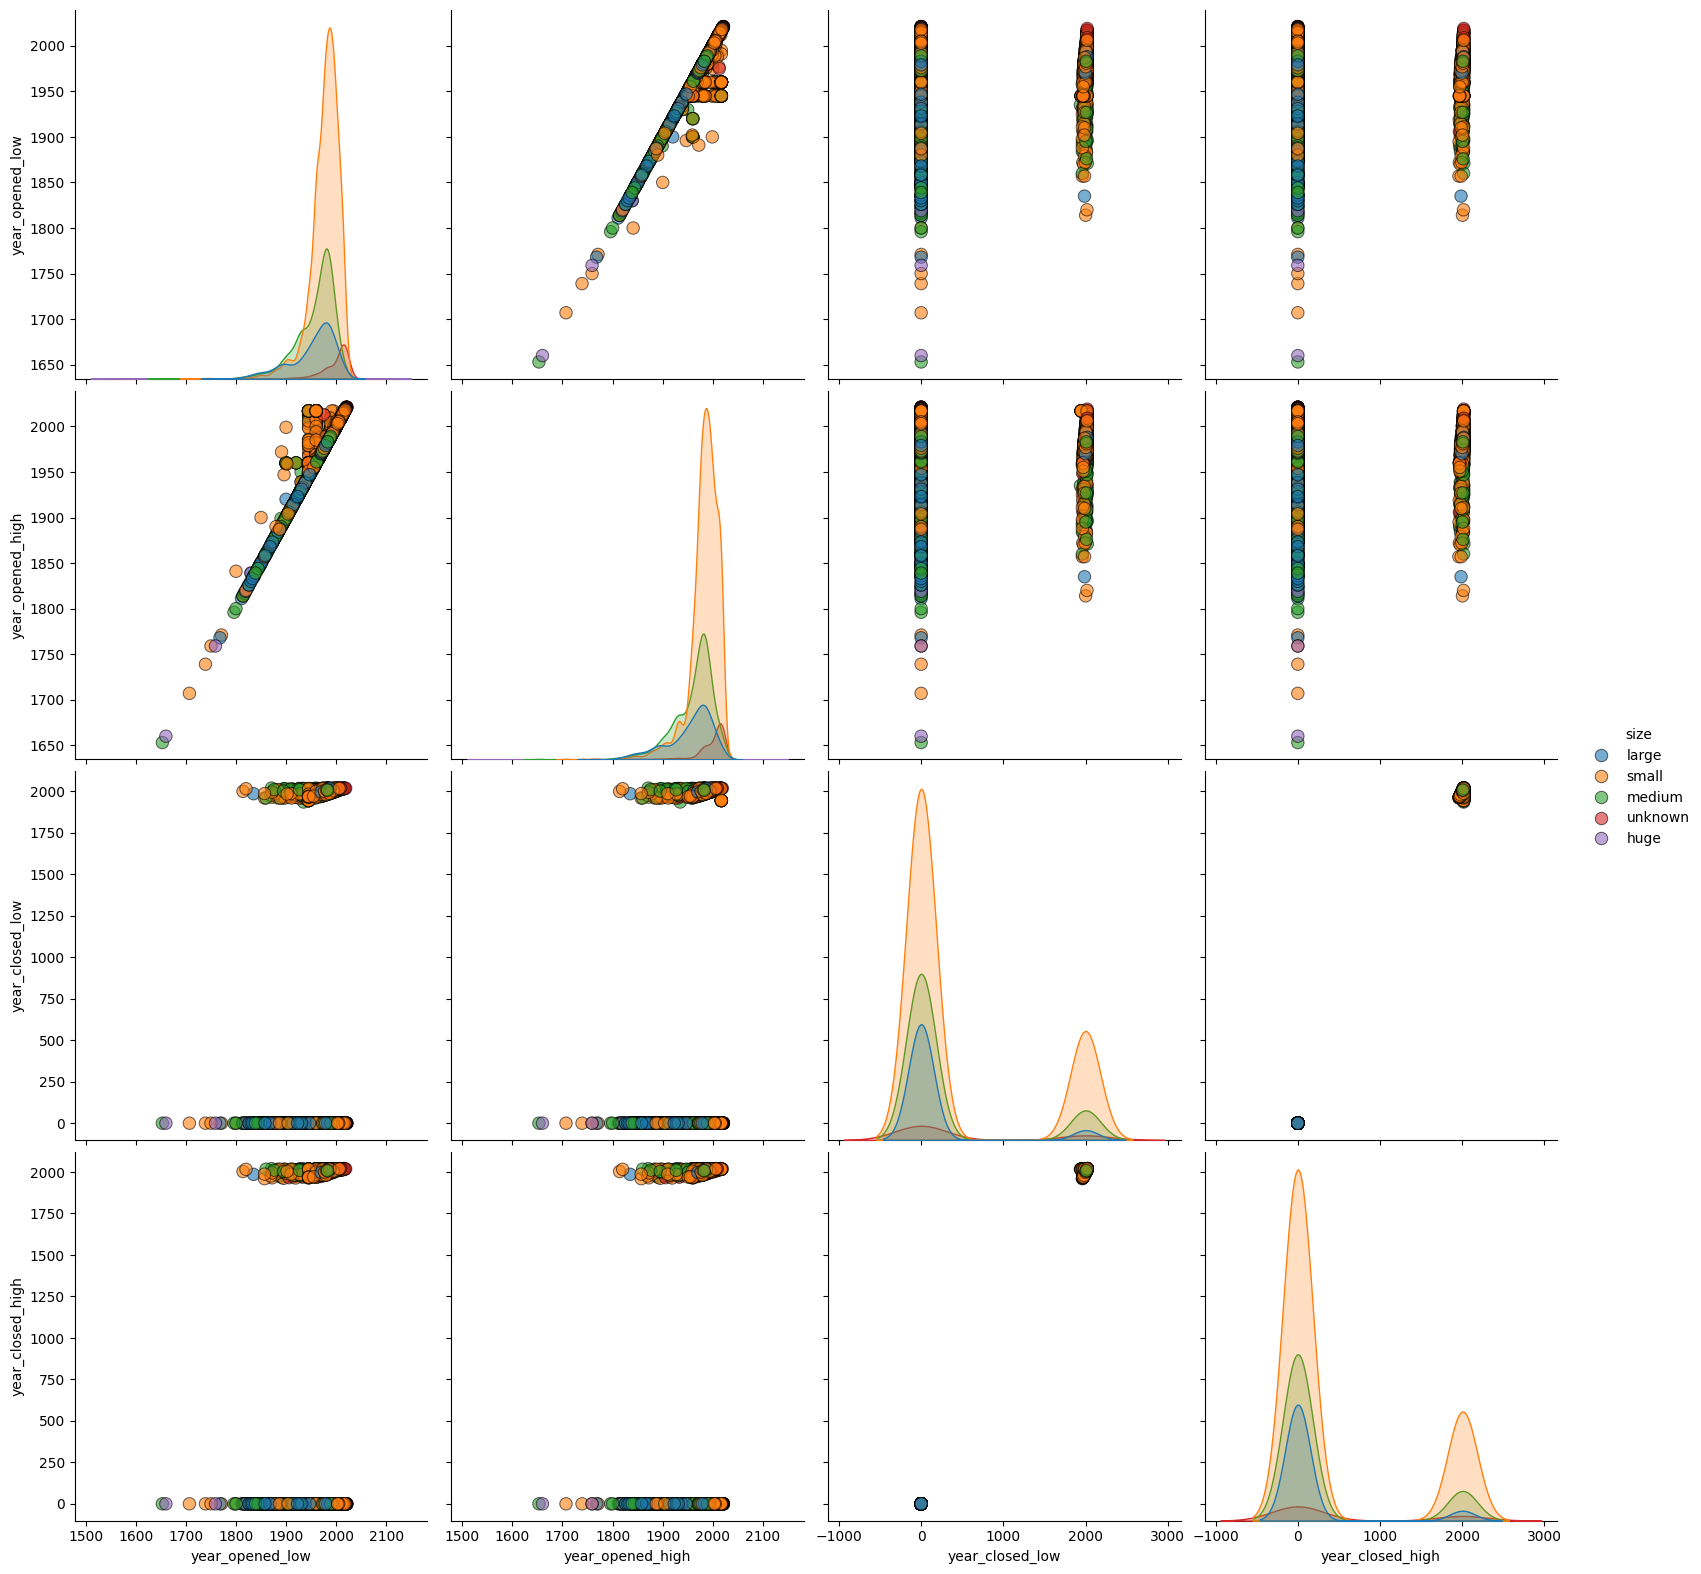

In [71]:
sns.pairplot(YearOpenClose_df, hue = 'size', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)

<Axes: ylabel='Frequency'>

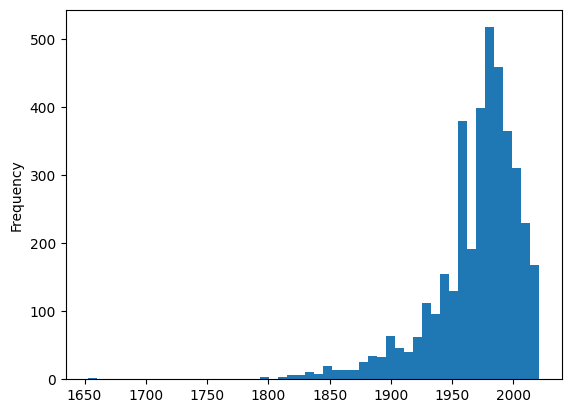

In [85]:
YearOpenClose_df.year_opened_low.plot.hist(bins=50)

<ipython-input-91-6742d22cb666>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(YearOpenClose_df['year_closed_low'], hist = False, kde = True,
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


<Axes: xlabel='year_closed_low', ylabel='Density'>

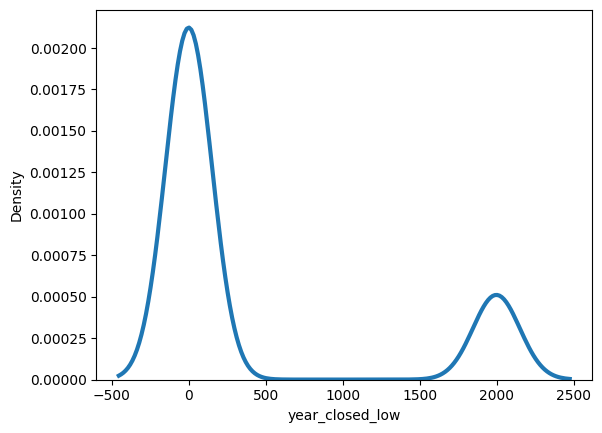

In [91]:
sns.distplot(YearOpenClose_df['year_closed_low'], hist = False, kde = True,
                 kde_kws = {'shade': False, 'linewidth': 3},
                  label = YearOpenClose_df.size)

<ipython-input-92-dfe75061d484>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(YearOpenClose_df['year_opened_low'], hist = False, kde = True,
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


<Axes: xlabel='year_opened_low', ylabel='Density'>

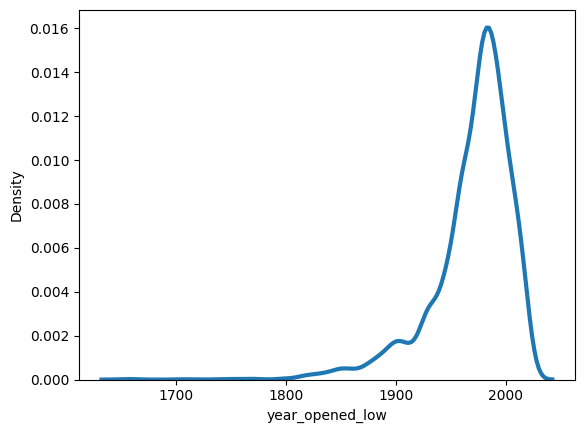

In [92]:
sns.distplot(YearOpenClose_df['year_opened_low'], hist = False, kde = True,
                 kde_kws = {'shade': False, 'linewidth': 3},
                  label = YearOpenClose_df.size)



<ipython-input-93-29000eda6ad5>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(YearOpenClose_df[['year_opened_low']], hist=False, rug=True, label='year_opened_low', color="#FF9966")
<ipython-input-93-29000eda6ad5>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(YearOpenClose

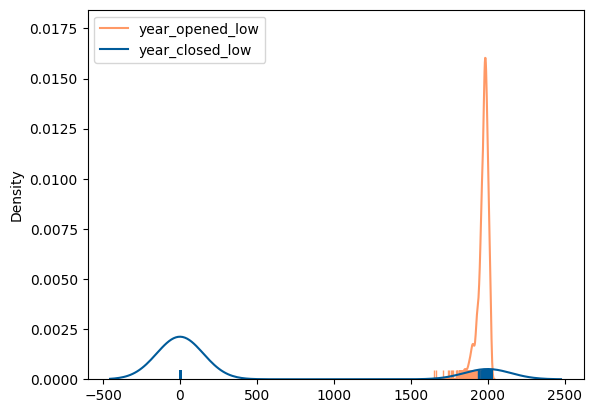

In [93]:

#fig = plt.figure(figsize=(10,6))

sns.distplot(YearOpenClose_df[['year_opened_low']], hist=False, rug=True, label='year_opened_low', color="#FF9966")
sns.distplot(YearOpenClose_df[['year_closed_low']], hist=False, rug=True, label='year_closed_low', color="#005B9A")

plt.legend()
plt.show()

<ipython-input-95-48eccbe2a595>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(YearOpenClose_df[['year_opened_high']], hist=False, rug=True, label='year_opened_high', color="#FF9966")
<ipython-input-95-48eccbe2a595>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(YearOpenClo

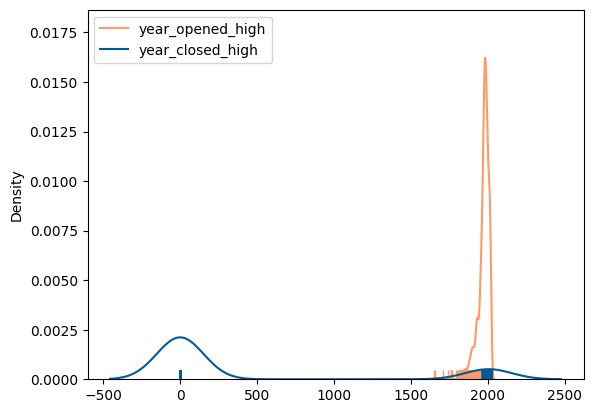

In [95]:
sns.distplot(YearOpenClose_df[['year_opened_high']], hist=False, rug=True, label='year_opened_high', color="#FF9966")
sns.distplot(YearOpenClose_df[['year_closed_high']], hist=False, rug=True, label='year_closed_high', color="#005B9A")

plt.legend()
plt.show()